# Window Functions
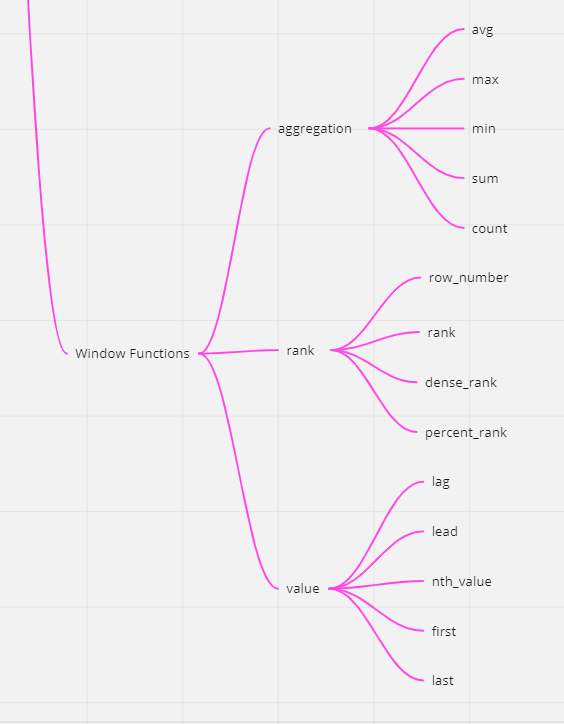

In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = (SparkSession.builder
                    .appName('PySparkSyntax')
                    .getOrCreate()
        )

# criar um DataFrame exemplo
data = [("João", "Vendedor", 15000),
        ("Maria", "Analista", 20000),
        ("Pedro", "Vendedor", 15000),
        ("Andrey", "Vendedor", 11000),
        ("Luan", "Vendedor", 12000),
        ("Bruna", "Vendedor", 13000),
        ("Ana", "Gerente", 25000),
        ("Paulo", "Analista", 18000),
        ("Lucas", "Vendedor", 10000)]

df = spark.createDataFrame(data, ["nome", "cargo", "salario"])

# Aggregation

In [29]:
window = (Window.partitionBy("cargo")
                .orderBy('cargo', 'salario')
                .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)
         )

## avg

In [30]:
df_rank = df.withColumn("avg", F.avg('salario').over(window))

df_rank.show()

+------+--------+-------+------------------+
|  nome|   cargo|salario|               avg|
+------+--------+-------+------------------+
|   Ana| Gerente|  25000|           25000.0|
| Lucas|Vendedor|  10000|12666.666666666666|
|Andrey|Vendedor|  11000|12666.666666666666|
|  Luan|Vendedor|  12000|12666.666666666666|
| Bruna|Vendedor|  13000|12666.666666666666|
|  João|Vendedor|  15000|12666.666666666666|
| Pedro|Vendedor|  15000|12666.666666666666|
| Paulo|Analista|  18000|           19000.0|
| Maria|Analista|  20000|           19000.0|
+------+--------+-------+------------------+



## max

In [31]:
df_rank = df.withColumn("max", F.max('salario').over(window))

df_rank.show()

+------+--------+-------+-----+
|  nome|   cargo|salario|  max|
+------+--------+-------+-----+
|   Ana| Gerente|  25000|25000|
| Lucas|Vendedor|  10000|15000|
|Andrey|Vendedor|  11000|15000|
|  Luan|Vendedor|  12000|15000|
| Bruna|Vendedor|  13000|15000|
|  João|Vendedor|  15000|15000|
| Pedro|Vendedor|  15000|15000|
| Paulo|Analista|  18000|20000|
| Maria|Analista|  20000|20000|
+------+--------+-------+-----+



## min

In [32]:
df_rank = df.withColumn("min", F.min('salario').over(window))

df_rank.show()

+------+--------+-------+-----+
|  nome|   cargo|salario|  min|
+------+--------+-------+-----+
|   Ana| Gerente|  25000|25000|
| Lucas|Vendedor|  10000|10000|
|Andrey|Vendedor|  11000|10000|
|  Luan|Vendedor|  12000|10000|
| Bruna|Vendedor|  13000|10000|
|  João|Vendedor|  15000|10000|
| Pedro|Vendedor|  15000|10000|
| Paulo|Analista|  18000|18000|
| Maria|Analista|  20000|18000|
+------+--------+-------+-----+



## sum

In [33]:
df_rank = df.withColumn("sum", F.sum('salario').over(window))

df_rank.show()

+------+--------+-------+-----+
|  nome|   cargo|salario|  sum|
+------+--------+-------+-----+
|   Ana| Gerente|  25000|25000|
| Lucas|Vendedor|  10000|76000|
|Andrey|Vendedor|  11000|76000|
|  Luan|Vendedor|  12000|76000|
| Bruna|Vendedor|  13000|76000|
|  João|Vendedor|  15000|76000|
| Pedro|Vendedor|  15000|76000|
| Paulo|Analista|  18000|38000|
| Maria|Analista|  20000|38000|
+------+--------+-------+-----+



## count

In [34]:
df_rank = df.withColumn("count", F.count('salario').over(window))

df_rank.show()

+------+--------+-------+-----+
|  nome|   cargo|salario|count|
+------+--------+-------+-----+
|   Ana| Gerente|  25000|    1|
| Lucas|Vendedor|  10000|    6|
|Andrey|Vendedor|  11000|    6|
|  Luan|Vendedor|  12000|    6|
| Bruna|Vendedor|  13000|    6|
|  João|Vendedor|  15000|    6|
| Pedro|Vendedor|  15000|    6|
| Paulo|Analista|  18000|    2|
| Maria|Analista|  20000|    2|
+------+--------+-------+-----+



# Ranking

In [45]:
window = (Window.partitionBy("cargo")
                .orderBy('cargo', 'salario')
         )

## [row_number](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.row_number.html)

pyspark.sql.functions.row_number() → pyspark.sql.column.Column

Window function: returns a sequential number starting at 1 within a window partition.

In [36]:
df_rank = df_rank.withColumn("row_number", F.row_number().over(window))

df_rank.show()

+------+--------+-------+-----+----------+
|  nome|   cargo|salario|count|row_number|
+------+--------+-------+-----+----------+
|   Ana| Gerente|  25000|    1|         1|
| Lucas|Vendedor|  10000|    6|         1|
|Andrey|Vendedor|  11000|    6|         2|
|  Luan|Vendedor|  12000|    6|         3|
| Bruna|Vendedor|  13000|    6|         4|
|  João|Vendedor|  15000|    6|         5|
| Pedro|Vendedor|  15000|    6|         6|
| Paulo|Analista|  18000|    2|         1|
| Maria|Analista|  20000|    2|         2|
+------+--------+-------+-----+----------+



## [rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.rank.html#pyspark.sql.functions.rank)

rank() → pyspark.sql.column.Column

Window function: returns the rank of rows within a window partition.

In [37]:
df_rank = df.withColumn("rank", F.rank().over(window))

df_rank.show()

+------+--------+-------+----+
|  nome|   cargo|salario|rank|
+------+--------+-------+----+
|   Ana| Gerente|  25000|   1|
| Lucas|Vendedor|  10000|   1|
|Andrey|Vendedor|  11000|   2|
|  Luan|Vendedor|  12000|   3|
| Bruna|Vendedor|  13000|   4|
|  João|Vendedor|  15000|   5|
| Pedro|Vendedor|  15000|   5|
| Paulo|Analista|  18000|   1|
| Maria|Analista|  20000|   2|
+------+--------+-------+----+



## [dense_rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.dense_rank.html#pyspark.sql.functions.dense_rank)

dense_rank() → pyspark.sql.column.Column

Window function: returns the rank of rows within a window partition, without any gaps.

In [38]:
df_rank = df_rank.withColumn("dense_rank", F.dense_rank().over(window))

df_rank.show()

+------+--------+-------+----+----------+
|  nome|   cargo|salario|rank|dense_rank|
+------+--------+-------+----+----------+
|   Ana| Gerente|  25000|   1|         1|
| Lucas|Vendedor|  10000|   1|         1|
|Andrey|Vendedor|  11000|   2|         2|
|  Luan|Vendedor|  12000|   3|         3|
| Bruna|Vendedor|  13000|   4|         4|
|  João|Vendedor|  15000|   5|         5|
| Pedro|Vendedor|  15000|   5|         5|
| Paulo|Analista|  18000|   1|         1|
| Maria|Analista|  20000|   2|         2|
+------+--------+-------+----+----------+



## [percent_rank](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.percent_rank.html#pyspark.sql.functions.percent_rank)
percent_rank() → pyspark.sql.column.Column

Window function: returns the relative rank (i.e. percentile) of rows within a window partition

In [39]:
df_rank = df_rank.withColumn("percent_rank", F.percent_rank().over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|
+------+--------+-------+----+----------+------------+
|   Ana| Gerente|  25000|   1|         1|         0.0|
| Lucas|Vendedor|  10000|   1|         1|         0.0|
|Andrey|Vendedor|  11000|   2|         2|         0.2|
|  Luan|Vendedor|  12000|   3|         3|         0.4|
| Bruna|Vendedor|  13000|   4|         4|         0.6|
|  João|Vendedor|  15000|   5|         5|         0.8|
| Pedro|Vendedor|  15000|   5|         5|         0.8|
| Paulo|Analista|  18000|   1|         1|         0.0|
| Maria|Analista|  20000|   2|         2|         1.0|
+------+--------+-------+----+----------+------------+



# Value

## [lag](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lag.html#pyspark.sql.functions.lag)
lag(col: ColumnOrName, offset: int = 1, default: Optional[Any] = None) → pyspark.sql.column.Column

Window function: returns the value that is offset rows before the current row, and default if there is less than offset rows before the current row. For example, an offset of one will return the previous row at any given point in the window partition.

In [40]:
df_rank = (df_rank.withColumn("lag", F.lag('nome').over(window))
                   .withColumn("lag2", F.lag('nome', 2).over(window))
          )

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|
+------+--------+-------+----+----------+------------+------+------+
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|
+------+--------+-------+----+----------+------------+------+------+



## [lead](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.lead.html#pyspark.sql.functions.lead)
lead(col: ColumnOrName, offset: int = 1, default: Optional[Any] = None) → pyspark.sql.column.Column

Window function: returns the value that is offset rows after the current row, and default if there is less than offset rows after the current row. For example, an offset of one will return the next row at any given point in the window partition.

In [41]:
df_rank = (df_rank.withColumn("lead", F.lead('nome').over(window))
                   .withColumn("lead2", F.lead('nome', 2).over(window))
          )

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|
+------+--------+-------+----+----------+------------+------+------+------+-----+
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|  João|Pedro|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan| Pedro| null|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|  null| null|
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null| Maria| null|
| Maria|Analista|  20000|   2|         2|         1.0| Paulo|  null|  null| null|
+------+--------

# [nth_value](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.nth_value.html)

pyspark.sql.functions.nth_value(col: ColumnOrName, offset: int, ignoreNulls: Optional[bool] = False) → pyspark.sql.column.Column

Window function: returns the value that is the offsetth row of the window frame (counting from 1), and null if the size of window frame is less than offset rows.

It will return the offsetth non-null value it sees when ignoreNulls is set to true. If all values are null, then null is returned.

This is equivalent to the nth_value function in SQL.

In [46]:
df_rank = df_rank.withColumn("nth_value2", F.nth_value('nome', 2).over(window))

df_rank.show()

AttributeError: module 'pyspark.sql.functions' has no attribute 'nth_value'

## first

In [47]:
window = (Window.partitionBy("cargo")
                .orderBy('cargo', 'salario')
                .rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)
         )

In [48]:
df_rank = df_rank.withColumn("first", F.first('salario').over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+-----+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|first|
+------+--------+-------+----+----------+------------+------+------+------+-----+-----+
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|25000|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|10000|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|10000|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|10000|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|  João|Pedro|10000|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan| Pedro| null|10000|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|  null| null|10000|
| Paulo|Analista|  18000|   1|         1|         0.0|  null|  null| Maria| null|18000|
| Maria|Analista|  20000|   2|  

## last

In [49]:
df_rank = df_rank.withColumn("last", F.last('salario').over(window))

df_rank.show()

+------+--------+-------+----+----------+------------+------+------+------+-----+-----+-----+
|  nome|   cargo|salario|rank|dense_rank|percent_rank|   lag|  lag2|  lead|lead2|first| last|
+------+--------+-------+----+----------+------------+------+------+------+-----+-----+-----+
|   Ana| Gerente|  25000|   1|         1|         0.0|  null|  null|  null| null|25000|25000|
| Lucas|Vendedor|  10000|   1|         1|         0.0|  null|  null|Andrey| Luan|10000|15000|
|Andrey|Vendedor|  11000|   2|         2|         0.2| Lucas|  null|  Luan|Bruna|10000|15000|
|  Luan|Vendedor|  12000|   3|         3|         0.4|Andrey| Lucas| Bruna| João|10000|15000|
| Bruna|Vendedor|  13000|   4|         4|         0.6|  Luan|Andrey|  João|Pedro|10000|15000|
|  João|Vendedor|  15000|   5|         5|         0.8| Bruna|  Luan| Pedro| null|10000|15000|
| Pedro|Vendedor|  15000|   5|         5|         0.8|  João| Bruna|  null| null|10000|15000|
| Paulo|Analista|  18000|   1|         1|         0.0|  null